# 05_Module

## Hierarchical clustering

This example is modified from https://stackabuse.com/hierarchical-clustering-with-python-and-scikit-learn/

In [76]:
import pandas as pd

In [77]:
eD = pd.read_csv('energyData.csv') 

In [78]:
eD.head()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


In [79]:
import matplotlib.pyplot as plt

%matplotlib inline

In [80]:
X = eD.iloc[:, 0:8]
X_20 = eD.iloc[:20, 0:8]

Y = eD.iloc[:, 8:10]

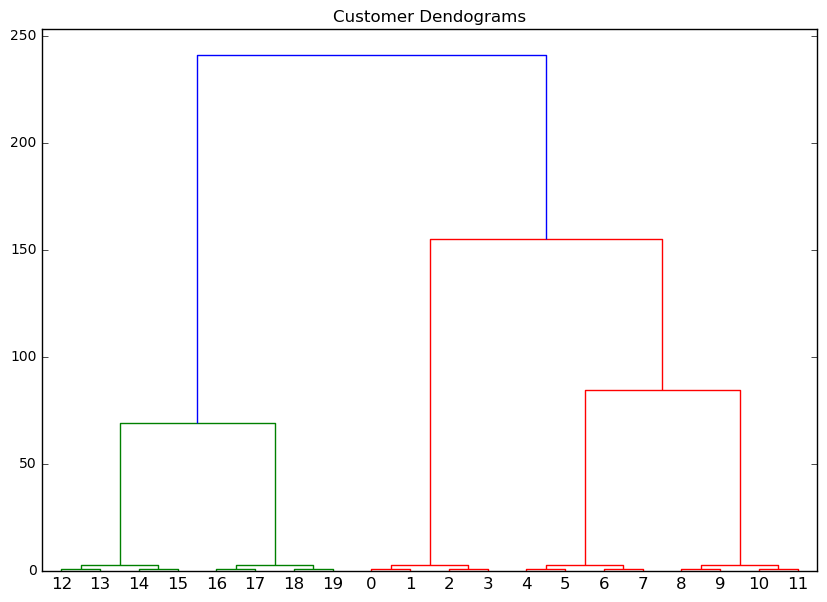

In [81]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(10, 7))  
plt.title("Heating load")  
dend = shc.dendrogram(shc.linkage(X_20, method='ward'))  

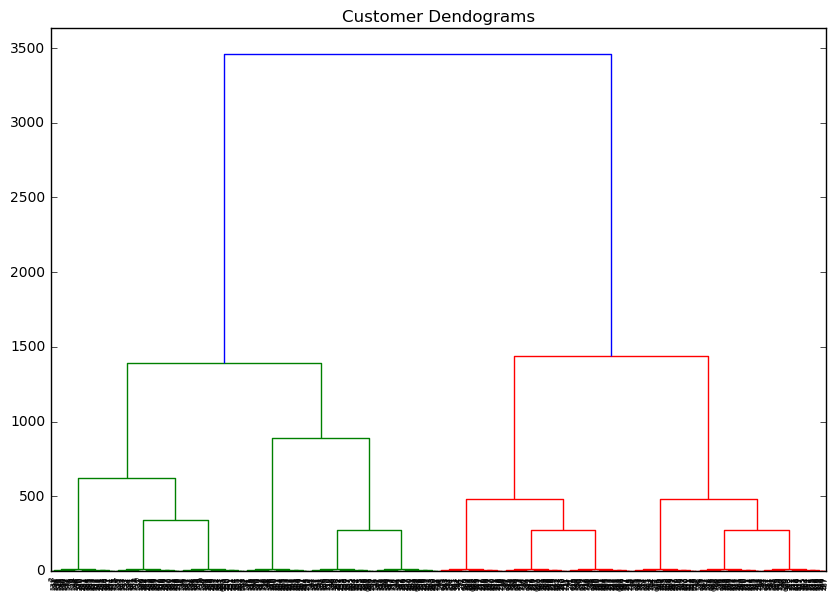

In [82]:
plt.figure(figsize=(10, 7))  
plt.title("Heating load")  
dend = shc.dendrogram(shc.linkage(X, method='ward'))  

In the script above we import the hierarchy class of the scipy.cluster library as shc. The hierarchy class has a dendrogram method which takes the value returned by the linkage method of the same class. The linkage method takes the dataset and the method to minimize distances as parameters. We use 'ward' as the method since it minimizes then variants of distances between the clusters.

In [83]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')  
cluster.fit_predict(X)  

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4,
       4, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 3, 3, 3, 3,
       3, 3, 4, 4, 4, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3,
       3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3,

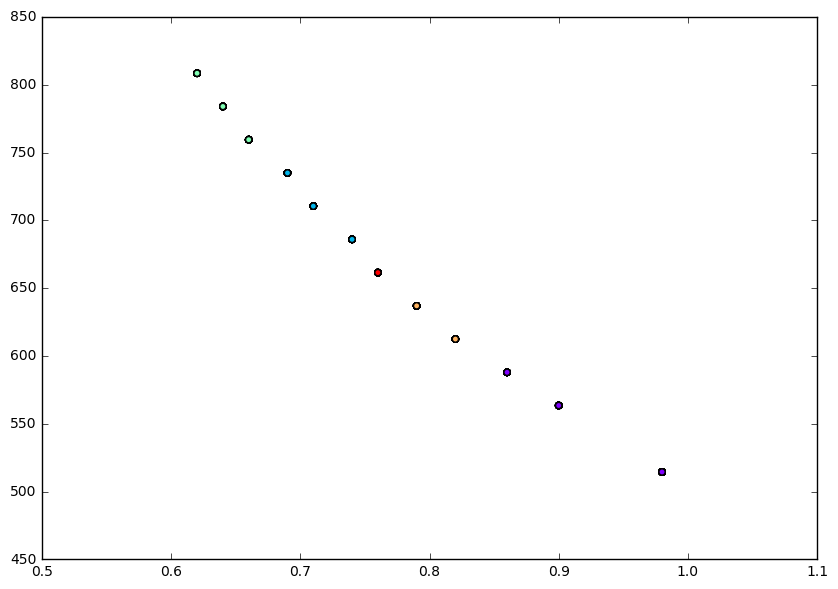

In [84]:
plt.figure(figsize=(10, 7))  
plt.scatter(eD['X1'], eD['X2'], c=cluster.labels_, cmap='rainbow')  

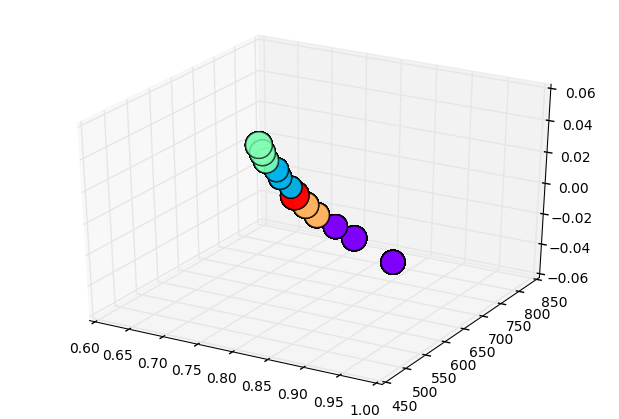

In [85]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = Axes3D(fig)

plt.scatter(eD['X1'], eD['X2'], eD['X3'], c=cluster.labels_, cmap='rainbow') 

## K-means clustering

In [86]:
# evaluation metric

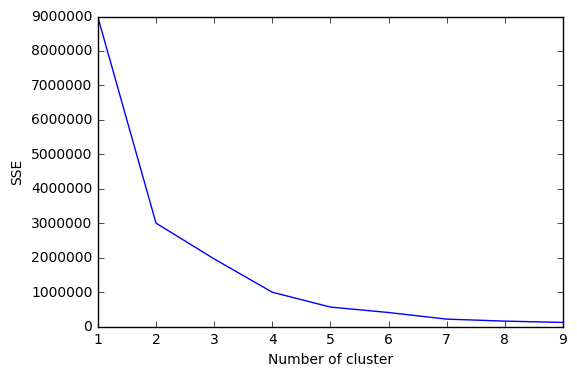

In [87]:
from sklearn.cluster import KMeans

sse = {}
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(X)
    Y["C"] = kmeans.labels_
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

In [88]:
# Google: http://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics

from sklearn.metrics import calinski_harabaz_score, silhouette_score

In [89]:
sse = {}
CH = {}
SS = {}

for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(X)
    Y["C"] = kmeans.labels_
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
    CH[k] = calinski_harabaz_score(X, kmeans.labels_)
    SS[k] = silhouette_score(X, kmeans.labels_)

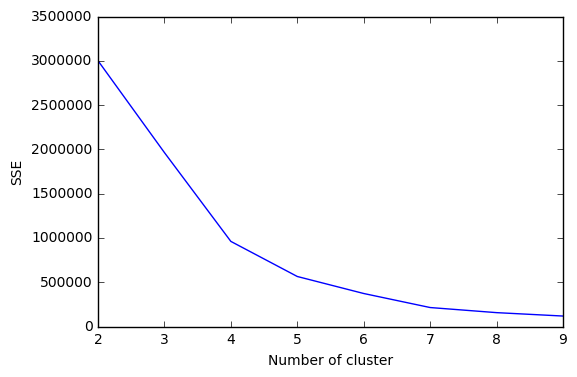

In [90]:
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

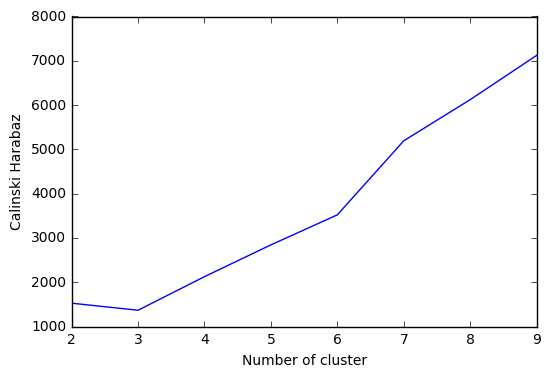

In [91]:
plt.figure()
plt.plot(list(CH.keys()), list(CH.values()))
plt.xlabel("Number of cluster")
plt.ylabel("Calinski Harabaz")
plt.show()

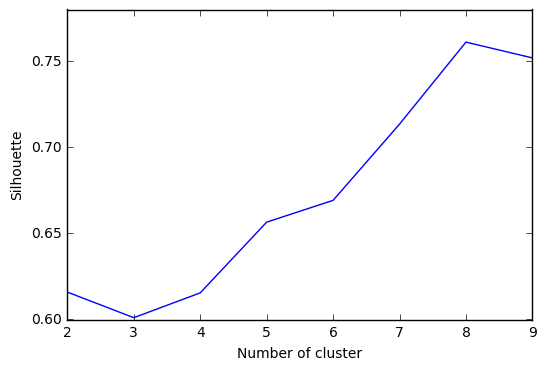

In [92]:
plt.figure()
plt.plot(list(SS.keys()), list(SS.values()))
plt.xlabel("Number of cluster")
plt.ylabel("Silhouette")
plt.show()

In [93]:
# Choosing k=4

In [94]:
kmeans = KMeans(n_clusters=4, max_iter=1000).fit(X)
Y["C"] = kmeans.labels_

In [95]:
set(Y["C"])

{0, 1, 2, 3}

In [96]:
import collections

collections.Counter(Y["C"])

Counter({0: 192, 1: 256, 2: 128, 3: 192})

In [ ]:
kmeans.<TAB>

In [97]:
kmeans.cluster_centers_

array([[7.13333333e-01, 7.10500000e+02, 2.69500000e+02, 2.20500000e+02,
        3.50000000e+00, 3.50000000e+00, 2.34375000e-01, 2.81250000e+00],
       [8.90000000e-01, 5.69625000e+02, 3.06250000e+02, 1.31687500e+02,
        7.00000000e+00, 3.50000000e+00, 2.34375000e-01, 2.81250000e+00],
       [7.75000000e-01, 6.49250000e+02, 3.79750000e+02, 1.34750000e+02,
        7.00000000e+00, 3.50000000e+00, 2.34375000e-01, 2.81250000e+00],
       [6.40000000e-01, 7.84000000e+02, 3.43000000e+02, 2.20500000e+02,
        3.50000000e+00, 3.50000000e+00, 2.34375000e-01, 2.81250000e+00]])